<a href="https://colab.research.google.com/github/aslamcm/Projects/blob/main/Shallow_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
from IPython.core.display import display, HTML
import warnings; warnings.simplefilter('ignore')
display(HTML("<style>.container { width:75% !important; }</style>"))

In [ ]:
train = pd.read_csv('train.csv')
train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [ ]:
test = pd.read_csv('test.csv')
test.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,Self-emp-not-inc,327120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Portugal
1,32,Private,123253,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42,United-States
2,47,Private,232628,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States
3,19,Private,374262,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States
4,46,Self-emp-not-inc,311231,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States


In [ ]:
train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

In [ ]:
test.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [ ]:
train['workclass'].unique()

array(['Private', 'State-gov', 'Self-emp-not-inc', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', nan, 'Never-worked', 'Without-pay'],
      dtype=object)

In [ ]:
"""# This Code will Count the occuring of the '?' in all the columns
for i in train.columns:
    t = train[i].value_counts()
    index = list(t.index)
    print ("The Value Counts of nan in", i)
    for i in index:
        temp = 0
        if i == np.nan:
            print (t[np.nan])
            temp = 1
            break
    if temp == 0:
        print ("0")"""

'# This Code will Count the occuring of the \'?\' in all the columns\nfor i in train.columns:\n    t = train[i].value_counts()\n    index = list(t.index)\n    print ("The Value Counts of nan in", i)\n    for i in index:\n        temp = 0\n        if i == np.nan:\n            print (t[np.nan])\n            temp = 1\n            break\n    if temp == 0:\n        print ("0")'

In [ ]:
train.describe

<bound method NDFrame.describe of        age  workclass  fnlwgt  ... hours-per-week  native-country income_>50K
0       67    Private  366425  ...             60   United-States           1
1       17    Private  244602  ...             15   United-States           0
2       31    Private  174201  ...             40   United-States           1
3       58  State-gov  110199  ...             40   United-States           0
4       25  State-gov  149248  ...             40   United-States           0
...    ...        ...     ...  ...            ...             ...         ...
43952   52    Private   68982  ...             50   United-States           1
43953   19    Private  116562  ...             40   United-States           0
43954   30    Private  197947  ...             58   United-States           0
43955   46    Private   97883  ...             35   United-States           0
43956   30    Private  375827  ...             40   United-States           0

[43957 rows x 15 columns]>

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [ ]:
train.isna().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [ ]:
train.workclass.value_counts() , train.workclass.mode()

(Private             30587
 Self-emp-not-inc     3464
 Local-gov            2822
 State-gov            1756
 Self-emp-inc         1518
 Federal-gov          1284
 Without-pay            20
 Never-worked            8
 Name: workclass, dtype: int64, 0    Private
 dtype: object)

In [ ]:
train.occupation.value_counts(), train.occupation.mode()

(Craft-repair         5519
 Prof-specialty       5518
 Exec-managerial      5506
 Adm-clerical         5004
 Sales                4965
 Other-service        4448
 Machine-op-inspct    2711
 Transport-moving     2121
 Handlers-cleaners    1878
 Farming-fishing      1348
 Tech-support         1321
 Protective-serv       874
 Priv-house-serv       225
 Armed-Forces           13
 Name: occupation, dtype: int64, 0    Craft-repair
 dtype: object)

In [ ]:
train['native-country'].value_counts(), train['native-country'].mode()

(United-States                 39429
 Mexico                          880
 Philippines                     273
 Germany                         188
 Puerto-Rico                     167
 Canada                          158
 El-Salvador                     145
 India                           134
 Cuba                            124
 China                           113
 England                         109
 South                           105
 Jamaica                          97
 Dominican-Republic               97
 Italy                            94
 Japan                            83
 Guatemala                        79
 Vietnam                          77
 Columbia                         75
 Poland                           72
 Haiti                            71
 Portugal                         59
 Taiwan                           58
 Iran                             52
 Nicaragua                        46
 Greece                           44
 Ecuador                          42
 

In [ ]:
train_clean = train.apply(lambda x: x.fillna(x.value_counts().index[0]))
train_clean

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [ ]:
train_clean.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

The maximum age is 90
The minimum age is 17


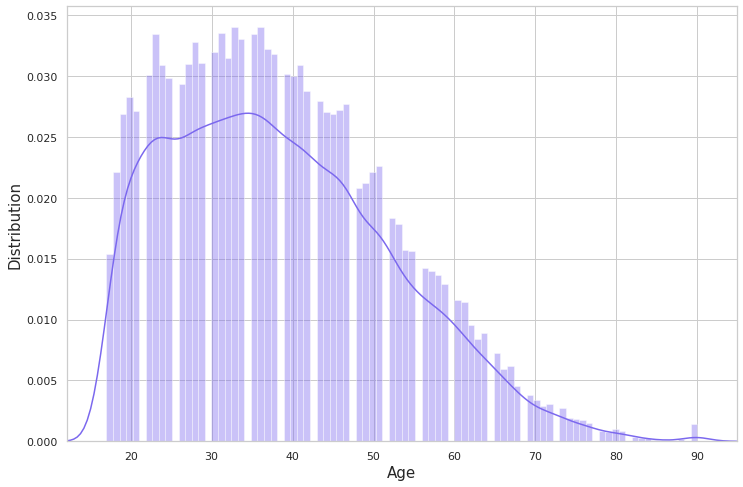

In [ ]:
# This distribution plot shows the distribution of Age of people across the Data Set
plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(train_clean['age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", train_clean['age'].max())
print ("The minimum age is", train_clean['age'].min())

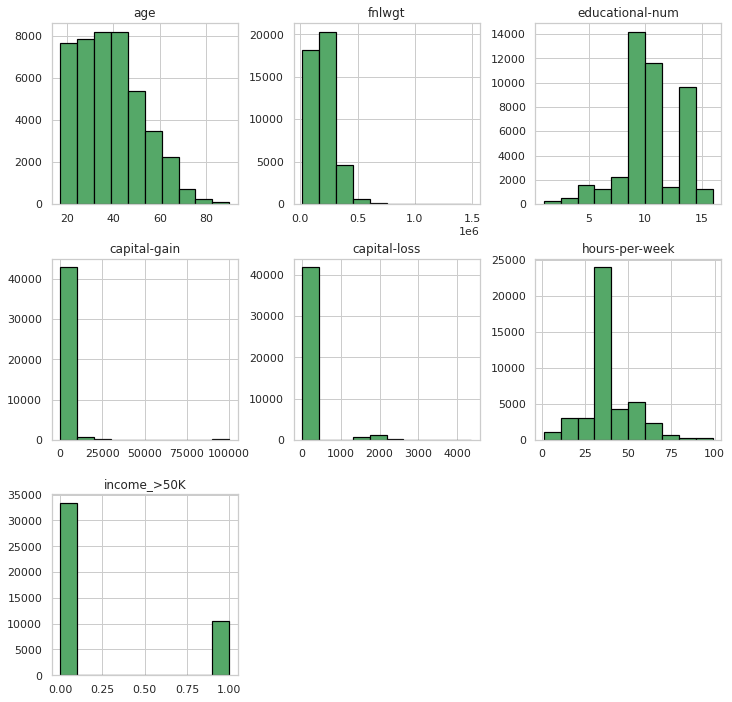

In [ ]:
# Distribution of Different Features of the Dataset

distribution = train_clean.hist(edgecolor = 'black', linewidth = 1.2, color = 'g')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

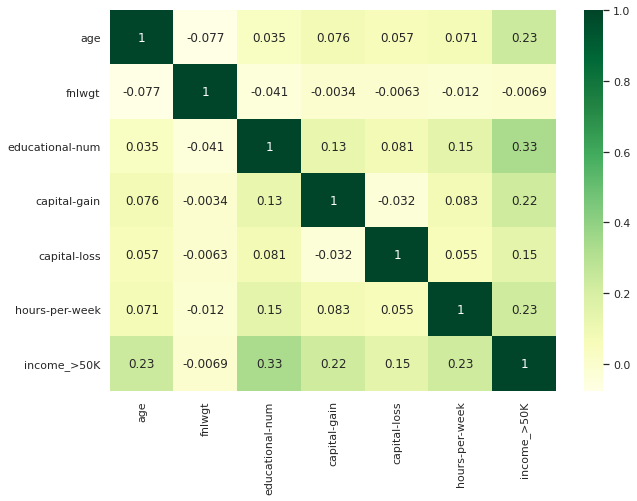

In [ ]:
# This heatmap shows the Correlation between the different variables

plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(train_clean.corr(), annot = True, color = 'red', cmap = 'YlGn');

In [ ]:
train_clean.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

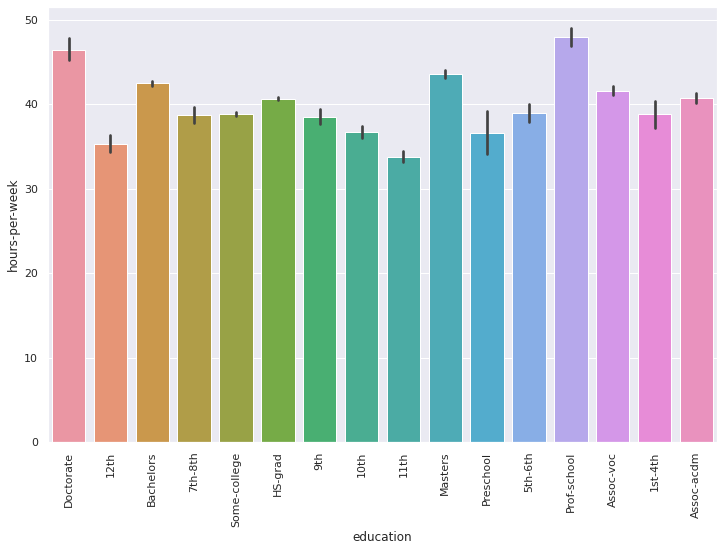

In [ ]:
# This shows the hours per week according to the education of the person

sns.set(rc={'figure.figsize':(12,8)})

sns_grad = sns.barplot(x = train_clean['education'], y = train_clean['hours-per-week'], data = train_clean)
plt.setp(sns_grad.get_xticklabels(), rotation=90);

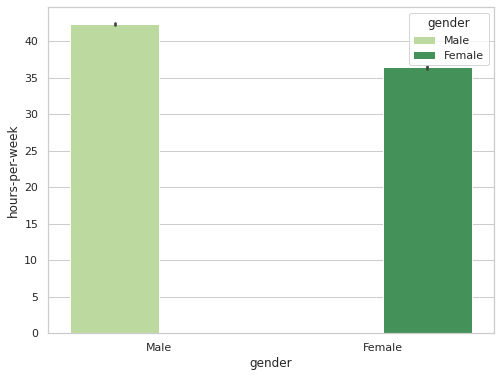

In [ ]:
# This bar graph shows the difference of hours per week between male and female 


sns.set(style = 'whitegrid', rc={'figure.figsize':(8,6)})
sns.barplot(x = train_clean['gender'], y = train_clean['hours-per-week'], data = train_clean,
            estimator = np.mean, hue = 'gender', palette = 'YlGn');

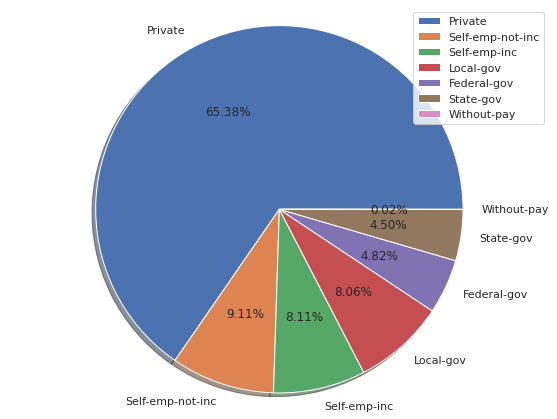

In [ ]:
# Creating Pandas Series for the workclasses whose income is higher than 50K 
train_1 = train_clean.loc[train_clean['income_>50K'] == 1,['workclass']]
workclass_types = train_1['workclass'].value_counts()
labels = list(workclass_types.index)
aggregate = list(workclass_types)

# This Pie chat shows the Percentage of different workclass who earns more than 50K
plt.pie(aggregate, labels = labels, autopct='%1.2f%%', shadow=True)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()

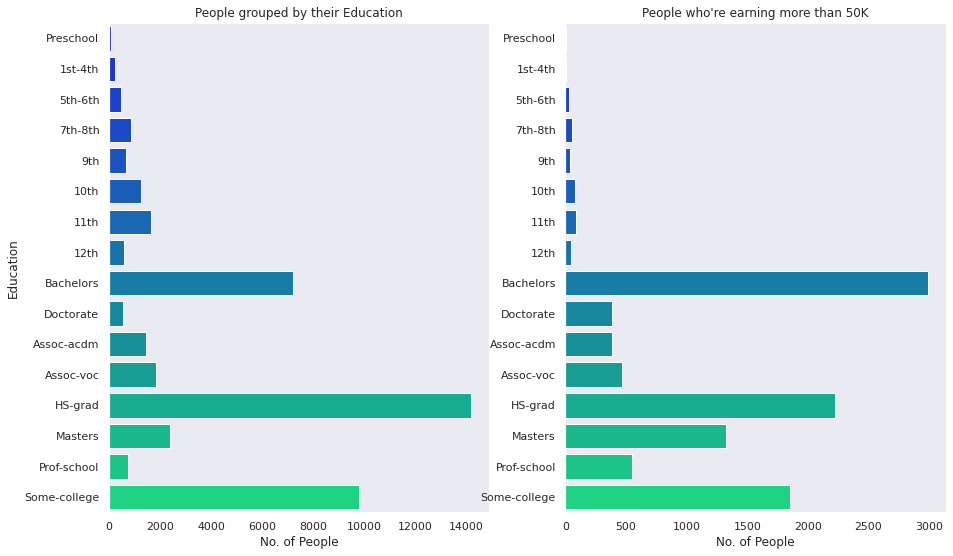

In [ ]:
# Grouping people by their education
education_size = train_clean.groupby('education').size()

# Grouping people who earns more than 50K by their education
income_above = train_clean.loc[train_clean['income_>50K'] == 1, ['education']].groupby('education').size()

sns.set(style = 'dark')
plt.rcParams['figure.figsize'] = [15, 9]
fig, ax = plt.subplots(1,2)

# Setting axes Labels and Titles
ax[0].set_ylabel("Education")
ax[0].set_xlabel("No. of People")
ax[1].set_xlabel("No. of People")
ax[0].title.set_text("People grouped by their Education")
ax[1].title.set_text("People who're earning more than 50K")

# Barplot for the people grouped by their education
sns_ed_1 = sns.barplot(x = list(education_size), y = list(education_size.index), palette = 'winter',
                       order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'Doctorate',
                                'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'], ax = ax[0])

# Barplot for the people who earns more than 50K grouped by their education
sns_ed_2 = sns.barplot(x = list(income_above), y = list(income_above.index), palette = 'winter',
                       order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'Doctorate',
                                'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'], ax = ax[1])

#plt.setp(sns_ed_1.get_xticklabels(), rotation = 90);
#plt.setp(sns_ed_2.get_xticklabels(), rotation = 90);

In [ ]:
train = train_clean

In [ ]:
# Changing the Categorical Values to Numerical values using the sklearns Label Encoder
from sklearn.preprocessing import LabelEncoder

categorical_features = list(train.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    train[feature] = label_encoder_feat[feature].fit_transform(train[feature])

train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,3,366425,10,16,0,3,1,4,1,99999,0,60,38,1
1,17,3,244602,2,8,4,7,3,4,1,0,0,15,38,0
2,31,3,174201,9,13,2,3,0,4,1,0,0,40,38,1
3,58,6,110199,5,4,2,13,0,4,1,0,0,40,38,0
4,25,6,149248,15,10,4,7,1,2,1,0,0,40,38,0


In [ ]:
# Changing the Categorical Values to Numerical values using the sklearns Label Encoder
from sklearn.preprocessing import LabelEncoder

categorical_features = list(test.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    test[feature] = label_encoder_feat[feature].fit_transform(test[feature])

test.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,4,327120,11,9,2,2,0,4,1,0,0,40,22
1,32,2,123253,7,12,2,2,0,4,1,0,0,42,28
2,47,2,232628,11,9,2,2,0,2,1,0,0,40,28
3,19,2,374262,2,8,4,5,3,4,1,0,0,20,28
4,46,4,311231,11,9,2,4,0,4,1,0,0,40,28


In [ ]:
#train.info()

In [ ]:
#test.describe()

In [ ]:
#test.head(10)

In [ ]:
#train_ohe = pd.get_dummies(train_clean)

In [ ]:
#test_ohe = pd.get_dummies(test)

In [ ]:
#train_ohe.info()

In [ ]:
#train_ohe.dtypes

In [ ]:
#test_ohe.dtypes

In [ ]:
#test_ohe.info()

In [ ]:
#train_ohe.head(10)

In [ ]:
#test_ohe.head(10)

In [ ]:
#train_ohe.describe()

In [ ]:
#test_ohe.describe()

In [ ]:
"""# Normalizing using sklearn

from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler().fit(train_ohe)

train_norm = normalizer.transform(train_ohe)
test_norm = normalizer.transform(test_ohe)

#normalizer"""

'# Normalizing using sklearn\n\nfrom sklearn.preprocessing import MinMaxScaler\n\nnormalizer = MinMaxScaler().fit(train_ohe)\n\ntrain_norm = normalizer.transform(train_ohe)\ntest_norm = normalizer.transform(test_ohe)\n\n#normalizer'

In [ ]:
"""# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
train_stand = train_ohe.copy()
test_stand = test_ohe.copy()

# numerical features
num_cols = ['age', 'fnlwgt','capital-gain','capital-loss', 'hours-per-week','educational-num']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(train_stand[[i]])
    
    # transform the training data column
    train_stand[i] = scale.transform(train_stand[[i]])
    
    # transform the testing data column
    test_stand[i] = scale.transform(test_stand[[i]])"""

"# data standardization with  sklearn\nfrom sklearn.preprocessing import StandardScaler\n\n# copy of datasets\ntrain_stand = train_ohe.copy()\ntest_stand = test_ohe.copy()\n\n# numerical features\nnum_cols = ['age', 'fnlwgt','capital-gain','capital-loss', 'hours-per-week','educational-num']\n\n# apply standardization on numerical features\nfor i in num_cols:\n    \n    # fit on training data column\n    scale = StandardScaler().fit(train_stand[[i]])\n    \n    # transform the training data column\n    train_stand[i] = scale.transform(train_stand[[i]])\n    \n    # transform the testing data column\n    test_stand[i] = scale.transform(test_stand[[i]])"

In [ ]:
#train_stand.describe()

In [ ]:
#test_stand.describe()

In [ ]:
#train_stand.columns

In [ ]:
#test_stand.columns

In [ ]:
train.shape , test.shape

((43957, 15), (899, 14))

In [ ]:
train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

In [ ]:
#train_stand.shape, test_stand.shape

In [ ]:
# Splitting the train data set into train and validation set
from sklearn.model_selection import train_test_split

features_ = train.drop(columns = ['income_>50K'])
target = train['income_>50K']
X_train, X_val, y_train, y_val = train_test_split(features_, target, test_size = 0.25,random_state = 0)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_val.shape)

Train data set size :  (32967, 14)
Test data set size :  (10990, 14)


In [ ]:
test.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,4,327120,11,9,2,2,0,4,1,0,0,40,22
1,32,2,123253,7,12,2,2,0,4,1,0,0,42,28
2,47,2,232628,11,9,2,2,0,2,1,0,0,40,28
3,19,2,374262,2,8,4,5,3,4,1,0,0,20,28
4,46,4,311231,11,9,2,4,0,4,1,0,0,40,28


In [ ]:
X_test = test

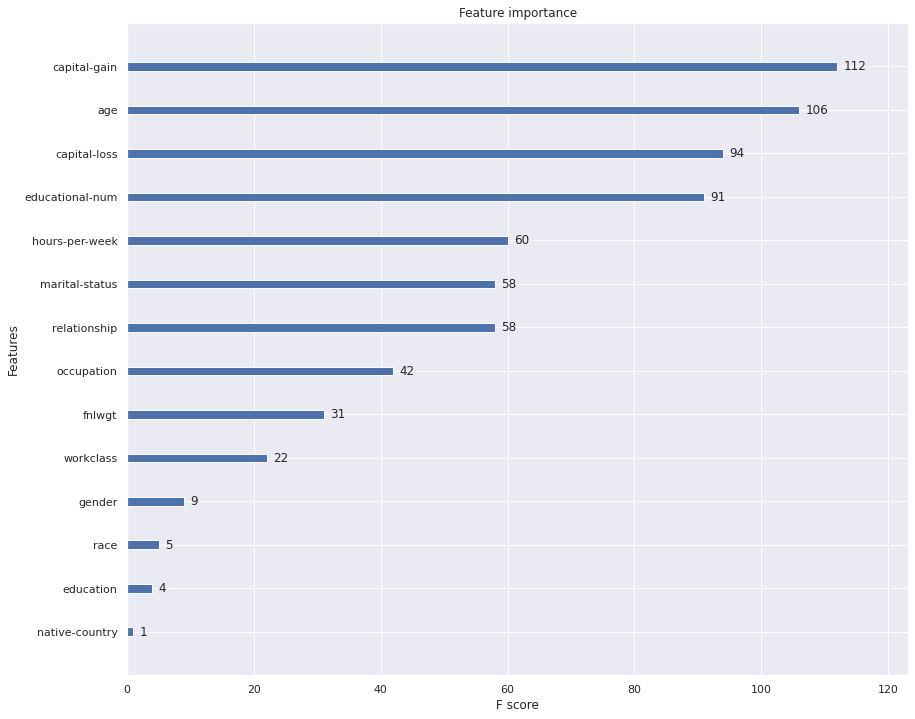

In [ ]:
# Plotting the feature importances using the Boosted Gradient Descent


from xgboost import XGBClassifier
from xgboost import plot_importance

# Training the model
model = XGBClassifier()
model_importance = model.fit(X_train, y_train)

# Plotting the Feature importance bar graph
plt.rcParams['figure.figsize'] = [14,12]
sns.set(style = 'darkgrid')
plot_importance(model_importance);

In [ ]:
# Training the model_1
logistic = LogisticRegression(C = 0.5, max_iter = 500)
model_1 = logistic.fit(X_train, y_train)

# Predictions
pred_1 = model_1.predict(X_val)
pred_test_1 = model_1.predict(X_test)

print ("The accuracy of model 1 on validation set is : ",round(accuracy_score(y_val, pred_1),3))
print ("The f1 score of model 1 on validation set is : ", round(f1_score(y_val, pred_1, average = 'binary'),3))


The accuracy of model 1 on validation set is :  0.785
The f1 score of model 1 on validation set is :  0.378


In [ ]:
# Training the model_2
R_forest = RandomForestClassifier(n_estimators = 500)
model_2 = R_forest.fit(X_train, y_train)

# Predictions
pred_2 = model_2.predict(X_val)
pred_test_2 = model_2.predict(X_test)

print ("The accuracy of model 2 on validation set is: ", round(accuracy_score(y_val, pred_2),3))
print ("The f1 score of model 2 on validation set is: ", round(f1_score(y_val, pred_2, average = 'binary'),3))

The accuracy of model 2 on validation set is:  0.859
The f1 score of model 2 on validation set is:  0.679


In [ ]:
final_predictions = pred_test_2

In [ ]:
final_predictions

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [ ]:
type(pred_test_2)

numpy.ndarray

In [ ]:
df_predictions = pd.DataFrame({'outcome': final_predictions})

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df_predictions.index.name = 'id'

In [ ]:
df_predictions

,outcome
id,
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0


In [ ]:
# Training the model 3
boosted_gd = XGBClassifier(learning_rate = 0.05, n_estimator = 500)
model_3 = boosted_gd.fit(X_train, y_train)

# Predictions
pred_3 = model_3.predict(X_val)
pred_test_3 = model_3.predict(X_test)

print ("The accuracy of model 3 : ",round(accuracy_score(y_val, pred_3),3))
print ("The f1 score of model 3 : ",round(f1_score(y_val, pred_3, average = 'binary'),3))

The accuracy of model 3 :  0.851
The f1 score of model 3 :  0.623


In [ ]:
# Training the model 4
NB = BernoulliNB(alpha = 0.3)
model_4 = NB.fit(X_train, y_train)

# Predictions
pred_4 = model_4.predict(X_val)
pred_test_4 = model_4.predict(X_test)

print ("The accuracy of model 4 : ", round(accuracy_score(y_val, pred_4),3))
print ("The f1 score of model 4 : ", round(f1_score(y_val, pred_4, average = 'binary'),3))

The accuracy of model 4 :  0.729
The f1 score of model 4 :  0.566


In [ ]:
# Training the model 5
svc = SVC(kernel = 'rbf', max_iter = 100, probability = True)
model_5 = svc.fit(X_train, y_train)

# Predictions
pred_5 = model_5.predict(X_val)
pred_test_5 = model_5.predict(X_test)

print ("The accuracy of model 5 : ", round(accuracy_score(y_val, pred_5),3))
print ("The f1 score of model 5 : ", round(f1_score(y_val, pred_5, average = 'binary'),3))

The accuracy of model 5 :  0.321
The f1 score of model 5 :  0.371


In [ ]:
# for the validation set 

list_pred = [pred_1, pred_2, pred_3, pred_4, pred_5]
model_names = ["Logistic Regression", "Random Forest Classifier", "Gradient Boosting Descent", "Bernoulli NB", "SVC"]

for i, predictions in enumerate(list_pred) :
    print ("Classification Report of ", model_names[i])
    print ()
    print (classification_report(y_val, predictions, target_names = ["<=50K", ">50K"]))

Classification Report of  Logistic Regression

              precision    recall  f1-score   support

       <=50K       0.81      0.94      0.87      8374
        >50K       0.61      0.27      0.38      2616

    accuracy                           0.78     10990
   macro avg       0.71      0.61      0.62     10990
weighted avg       0.76      0.78      0.75     10990

Classification Report of  Random Forest Classifier

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      8374
        >50K       0.74      0.62      0.68      2616

    accuracy                           0.86     10990
   macro avg       0.82      0.78      0.79     10990
weighted avg       0.85      0.86      0.85     10990

Classification Report of  Gradient Boosting Descent

              precision    recall  f1-score   support

       <=50K       0.86      0.96      0.91      8374
        >50K       0.79      0.52      0.62      2616

    accuracy                  

In [ ]:
# Generating the confusion matrx for different models

for i, pred in enumerate(list_pred) :
    print ("The Confusion Matrix of : ", model_names[i])
    print (pd.DataFrame(confusion_matrix(y_val, pred)))
    print ()

The Confusion Matrix of :  Logistic Regression
      0    1
0  7909  465
1  1899  717

The Confusion Matrix of :  Random Forest Classifier
      0     1
0  7808   566
1   981  1635

The Confusion Matrix of :  Gradient Boosting Descent
      0     1
0  8005   369
1  1267  1349

The Confusion Matrix of :  Bernoulli NB
      0     1
0  6081  2293
1   680  1936

The Confusion Matrix of :  SVC
      0     1
0  1327  7047
1   415  2201



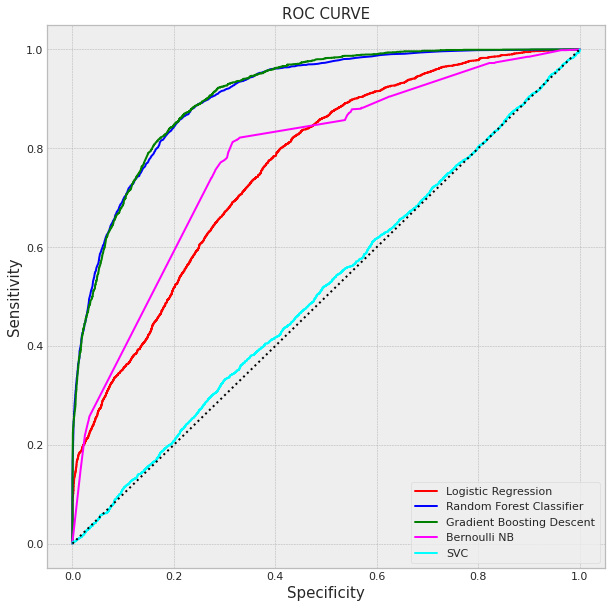

In [ ]:
# Generating ROC Curve for the classification models

models = [model_1, model_2, model_3, model_4, model_5]

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,10]
plt.style.use("bmh")

color = ['red', 'blue', 'green', 'fuchsia', 'cyan']
plt.title("ROC CURVE", fontsize = 15)
plt.xlabel("Specificity", fontsize = 15)
plt.ylabel("Sensitivity", fontsize = 15)
i = 1

for i, model in enumerate(models) :
    prob = model.predict_proba(X_val)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_val, prob_positive)
    plt.plot(fpr, tpr, color = color[i])
    plt.gca().legend(model_names, loc = 'lower right', frameon = True)

plt.plot([0,1],[0,1], linestyle = 'dotted', color = 'black')
plt.show()